# **Algorithm Complexity - INF1023**  
### **Program Studi Teknik Informatika – Universitas Muhammadiyah Kalimantan Timur**  

---


## Identitas Mahasiswa
NAMA    : Malik Sabarullah Akbar

NIM     :  2411102441250

KELAS   : B

---

# **BAB 1**
## Notation Big O

<img src='https://assets.digitalocean.com/articles/alligator/js/big-o-notation/o-complexity.png'>

<img src="https://media.licdn.com/dms/image/v2/D4E12AQEvsKZNftrL5w/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1734702748422?e=1762992000&v=beta&t=iX2DzTaqg3iwhH8Vjqe0-lrfjZz0xCZX4zPvaWUShyY">

# 1.Latar Belakang

## Brute force

- Brute force adalah metode menyelesaikan masalah dengan mencoba semua kemungkinan secara sistematis sampai menemukan jawaban yang benar.
- Ibarat mencari kunci yang cocok dengan mencoba satu per satu dari gantungan kunci, tanpa trik atau tebakan pintar.

Kapan dipakai
- Ruang kemungkinan kecil sehingga masih masuk akal dicoba semua.
- Butuh kepastian solusi yang pasti ditemukan jika ada.
- Sebagai pembanding (baseline) untuk menguji keakuratan metode yang lebih canggih.


---

## Greedy

Bayangkan kamu sedang berada di sebuah toko swalayan dan boleh mengambil beberapa barang dengan satu syarat: kamu harus membawa keranjang yang kapasitasnya terbatas. Tentu kamu ingin mendapatkan barang dengan total nilai setinggi mungkin, bukan?

Nah, **algoritma *greedy*** bekerja persis seperti cara berpikirmu saat itu. Dalam setiap langkah, kamu akan mengambil keputusan yang **paling menguntungkan saat itu juga** tanpa memikirkan konsekuensi di masa depan. Kamu akan melihat semua barang yang ada, lalu mengambil barang yang paling berharga terlebih dahulu. Kemudian, dari sisa pilihan yang ada, kamu ambil lagi yang paling berharga, dan begitu seterusnya sampai keranjangmu penuh.

Jadi, secara sederhana, **Algoritma *Greedy*** adalah metode pemecahan masalah yang membuat pilihan paling optimal secara lokal pada setiap tahap dengan harapan akan menemukan solusi optimal secara global. Kata "*greedy*" sendiri berarti "rakus" atau "tamak", karena algoritma ini selalu mengambil pilihan terbaik yang ada di depan mata saat itu juga.

**Karakteristik utama dari algoritma *greedy*** adalah:

  * **Membuat Pilihan Terbaik Saat Ini:** Pada setiap langkah, algoritma akan memilih opsi yang terlihat paling bagus pada saat itu.
  * **Tidak Melihat ke Belakang:** Sekali keputusan diambil, algoritma tidak akan mengubahnya lagi di langkah berikutnya. Keputusan itu bersifat final.
  * **Cepat dan Sederhana:** Biasanya, algoritma ini lebih cepat dan lebih mudah untuk diimplementasikan dibandingkan algoritma lain seperti *dynamic programming*.

Namun, perlu diingat, karena sifatnya yang hanya fokus pada keuntungan sesaat, algoritma *greedy* **tidak selalu menghasilkan solusi yang paling optimal** secara keseluruhan untuk semua jenis masalah. Namun, untuk beberapa masalah tertentu, pendekatan ini terbukti sangat efektif dan efisien.

---

# 2.Studi kasus

Coin exchange problem
diberikan uang senilai 55 untuk ditukarkan dengan koin tersedia:
1, 5, 10, 12, 15 dan 25



## Brute force

## Solusi Optimal
cara brute force untuk menyelesaikan masalah ini adalah dengan mencoba semua kombinasi koin yang mungkin untuk mencapai jumlah 55. Berikut adalah langkah-langkahnya:

1. (1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1) = 55
2. (5+5+5+5+5+5+5+5+5+5+5) = 55
3. (10+10+10+10+10+5) = 55
4. (12+12+12+12+12+5) = 55
5. (15+15+15+5+5) = 55
6. (25+25+5) = 55
7. (25+15+15) = 55
8. (25+12+12+5+1) = 55

Dari semua kombinasi di atas, kita dapat melihat bahwa kombinasi dengan jumlah koin paling sedikit adalah (25+25+5) yang menggunakan 3 koin. Jadi, solusi optimal untuk menukar uang senilai 55 dengan koin yang tersedia adalah menggunakan 3 koin: dua koin 25 dan satu koin 5.

## Solusi Non-Optimal
1. (10+10+10+10+10+5) = 55
2. (15+15+15+5+5) = 55
3. (12+12+12+12+12+5) = 55
4. (5+5+5+5+5+5+5+5+5+5+5) = 55
5. (1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1) = 55

Dari kombinasi di atas, kita dapat melihat bahwa kombinasi dengan jumlah koin paling banyak adalah no.5 yang menggunakan 55 koin. Jadi, solusi non-optimal untuk menukar uang senilai 55 dengan koin yang tersedia adalah menggunakan 55 koin: lima puluh lima koin 1.

In [1]:
# Brute force untuk masalah penukaran koin
# Target: 55, Koin tersedia: 1, 5, 10, 12, 15, 25

def brute_force_coin_change(coins, target):
    """
    Mencoba semua kombinasi jumlah koin untuk mencapai target.
    Mengembalikan kombinasi optimal (jumlah koin paling sedikit), total koin, dan jumlah solusi yang diuji.
    """
    n = len(coins)
    best_combo = None
    best_count = float("inf")
    solutions_checked = 0
    current = [0] * n  # jumlah koin untuk tiap denominasi

    def dfs(i, remaining):  # dfs: depth-first search
        nonlocal best_combo, best_count, solutions_checked
        if i == n:
            return

        coin = coins[i]
        max_k = remaining // coin  # jumlah maksimal koin 'coin' yang bisa diambil
        for k in range(max_k, -1, -1):
            current[i] = k
            sisa = remaining - k * coin
            if sisa == 0:
                solutions_checked += 1
                total_koin = sum(current)
                if total_koin < best_count:
                    best_count = total_koin
                    best_combo = current.copy()
            elif sisa > 0 and i + 1 < n:
                dfs(i + 1, sisa)

        current[i] = 0  # reset sebelum backtrack

    dfs(0, target)
    return best_combo, best_count, solutions_checked

# Data studi kasus
coins = [1, 5, 10, 12, 15, 25]
target = 55

best_combo, best_count, checked = brute_force_coin_change(coins, target)

if best_combo is None:
    print("Tidak ada kombinasi koin yang mencapai target.")
else:
    # Bentuk keluaran yang rapi
    solusi_mapping = {coin: cnt for coin, cnt in zip(coins, best_combo) if cnt}
    solusi_list = []
    for coin, cnt in zip(coins, best_combo):
        solusi_list.extend([coin] * cnt)

    print(f"Target: {target}")
    print(f"Koin tersedia: {coins}")
    print(f"Kombinasi optimal (jumlah koin paling sedikit): {solusi_mapping}")
    print(f"Daftar koin yang digunakan: {solusi_list}")
    print(f"Total koin: {best_count}")
    print(f"Jumlah solusi valid yang diperiksa: {checked}")

Target: 55
Koin tersedia: [1, 5, 10, 12, 15, 25]
Kombinasi optimal (jumlah koin paling sedikit): {5: 1, 25: 2}
Daftar koin yang digunakan: [5, 25, 25]
Total koin: 3
Jumlah solusi valid yang diperiksa: 190


In [2]:
def sequential_search(arr,target) :
    for i in range(len(arr)):
        print(f"loop : {i}")
        if arr[i] == target:
            return i
    
    return -1

my_arr = [29,19,29,39,49,19,294,231,534,23,55,22]
target = 23

print(sequential_search(my_arr,target))

loop : 0
loop : 1
loop : 2
loop : 3
loop : 4
loop : 5
loop : 6
loop : 7
loop : 8
loop : 9
9


### Kesimpulan

hal ini menunjukkan bagaimana metode brute force dapat digunakan untuk menemukan solusi optimal dengan mencoba semua kemungkinan kombinasi. Namun, perlu diingat bahwa metode ini bisa sangat tidak efisien untuk jumlah yang lebih besar atau lebih banyak jenis koin, karena jumlah kombinasi yang harus diperiksa akan meningkat secara eksponensial (O(2^n)).

eksponensial (O(2^n)) adalah notasi yang digunakan dalam analisis algoritma untuk menggambarkan pertumbuhan waktu atau ruang yang dibutuhkan oleh algoritma seiring dengan peningkatan ukuran inputnya. Dalam konteks brute force, ini berarti bahwa jumlah kombinasi yang harus diperiksa akan meningkat secara eksponensial dengan bertambahnya jumlah koin atau nilai uang yang ingin ditukar.

---

## Greedy

## Solusi Optimal
cara greedy untuk menyelesaikan masalah ini adalah dengan selalu memilih koin dengan nilai tertinggi yang masih bisa digunakan tanpa melebihi jumlah yang ingin ditukar. Berikut adalah langkah-langkahnya:

1. Pilih koin 25, sisa 30
2. Pilih koin 25, sisa 5
3. Pilih koin 5, sisa 0

Dengan langkah-langkah di atas, kita dapat melihat bahwa kombinasi koin yang digunakan adalah (25+25+5) yang menggunakan 3 koin. Jadi, solusi optimal untuk menukar uang senilai 55 dengan koin yang tersedia adalah menggunakan 3 koin: dua koin 25 dan satu koin 5.

<br>

In [3]:
jumlah_kembalian = 55  

def penukaran_uang_greedy(kembalian, koin=None):
    """
    Cari jumlah koin minimum (greedy dengan koin urut menurun).
    """
    if koin is None:
        try:
            koin = coins  # gunakan variabel coins yang sudah ada
        except NameError:
            koin = [1, 5, 10, 12, 15, 25]

    koin = sorted(koin, reverse=True)
    hasil_penukaran = []
    sisa = kembalian

    print(f"Memberikan kembalian sebesar: Rp {kembalian}")

    for nilai_koin in koin:
        if sisa == 0:
            break
        jumlah = sisa // nilai_koin
        if jumlah:
            hasil_penukaran.extend([nilai_koin] * jumlah)
            sisa -= jumlah * nilai_koin

    return hasil_penukaran

# Gunakan jumlah_kembalian yang sudah didefinisikan
koin_yang_diberikan = penukaran_uang_greedy(jumlah_kembalian)
print(f"Koin yang diberikan adalah: {koin_yang_diberikan}")
print(f"Total jumlah koin: {len(koin_yang_diberikan)} koin")

Memberikan kembalian sebesar: Rp 55
Koin yang diberikan adalah: [25, 25, 5]
Total jumlah koin: 3 koin


In [4]:
def greedy_coin_change(coins, target):
    """
    Pendekatan greedy untuk masalah penukaran koin.
    Mengembalikan kombinasi koin yang digunakan, total koin, dan jumlah solusi yang diuji.
    """
    coins = sorted(coins, reverse=True)
    combination = []
    remaining = target
    solutions_checked = 0

    for coin in coins:
        while remaining >= coin:
            combination.append(coin)
            remaining -= coin
            solutions_checked += 1

    if remaining != 0:
        return None, float("inf"), solutions_checked  # Tidak ada solusi

    return combination, len(combination), solutions_checked


coins = [1, 5, 10, 12, 15, 25]
target = 55

best_combo_greedy, best_count_greedy, checked_greedy = greedy_coin_change(coins, target)

print("\nPendekatan Greedy:")
if best_combo_greedy is None:
    print("Tidak ada kombinasi koin yang mencapai target.")
else:
    print("Kombinasi koin yang digunakan:", best_combo_greedy)
    print("Total koin yang digunakan:", best_count_greedy)
    print("Jumlah solusi yang diuji:", checked_greedy)


Pendekatan Greedy:
Kombinasi koin yang digunakan: [25, 25, 5]
Total koin yang digunakan: 3
Jumlah solusi yang diuji: 3


### Kesimpulan

Metode greedy ini sangat efisien karena hanya memerlukan waktu linier (O(n)) untuk menemukan solusi, di mana n adalah jumlah jenis koin yang tersedia. Namun, perlu diingat bahwa metode greedy tidak selalu menghasilkan solusi optimal untuk semua jenis masalah, tetapi dalam kasus ini, metode greedy berhasil menemukan solusi optimal.

---

# **BAB 2**

# Algoritma divide and conquer

<sub>
Menggunakan AI ChatGPT dan Gemini <br>
Prompt ChatGPT: Bertindak sebagai dosen pemrograman, jelaskan pengertian algoritma divide and conquer dalam pemrograman beserta langkah-langkahnya dan berikan contoh implementasinya dalam bentuk gambar
Prompt Gemini: bertindaklah seperti ahli dalam algoritma pemrograman. Dari penulisan materi saya di file ipynb ini apakah ada saran atau perubahan yang harus saya perbaiki agar lebih mudah dipahami oleh orang lain?.
dan saya ingin menambahkan daftar pustaka dari jurnal yang berkaitan dengan materi yang saya bikin tersebut, tolong carikan jurnal tersebut.
</sub>
<br><br>

Algoritma divide and conquer adalah sebuah paradigma pemrograman yang membagi masalah besar menjadi beberapa sub-masalah yang lebih kecil agar lebih mudah dilakukan penyelesaian. <br>

Bayangkan Anda harus mencari sebuah kata dalam kamus tebal. Anda tidak akan membacanya dari halaman pertama sampai akhir. Sebaliknya, Anda akan membuka kamus di bagian tengah ( Divide ), melihat apakah kata Anda ada di paruh pertama atau kedua, lalu mengabaikan separuh yang tidak relevan. Anda mengulangi proses ini pada bagian yang lebih kecil ( Conquer ) hingga Anda menemukan halamannya. Inilah inti dari strategi Divide and Conquer: memecah masalah besar menjadi potongan-potongan yang lebih mudah dikelola.

Algoritma ini biasanya terdiri dari tiga langkah utama, yaitu:

1. **Divide (Membagi)**: Memecah masalah utama menjadi beberapa sub-masalah yang lebih kecil dan lebih mudah dipecahkan.
2. **Conquer (Menaklukkan)**: Menyelesaikan setiap sub-masalah secara rekursif. Jika sub-masalah cukup kecil, maka dapat diselesaikan secara langsung.
3. **Combine (Menggabungkan)**: Menggabungkan solusi dari sub-masalah untuk membentuk solusi dari masalah utama.

<sub>Sumber: [GeeksforGeeks](https://www.geeksforgeeks.org/divide-and-conquer-algorithm-introduction/)</sub>

<sub>
Menurut pendapat pribadi
</sub>

Algoritma divide dan conquer sangat efektif untuk menyelesaikan masalah yang kompleks, terutama ketika masalah tersebut dapat dipecah menjadi bagian-bagian yang lebih kecil dan digabungkan kembali. Contoh penerapan algoritma ini termasuk dalam algoritma pengurutan seperti Merge Sort dan Quick Sort. Tetapi, algoritma ini juga memiliki kelemahan, seperti overhead dari pemanggilan fungsi rekursif O(n log n) yang dapat mempengaruhi kinerja pada masalah yang sangat besar.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*dWet_YU-5072Kcko7LzsuQ.jpeg" alt="Notasi Big O" width="600"  />

<br><br>

### Contoh Implementasi Algoritma Divide and Conquer


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240501171531/Working-of-Divide-and-Conquer-Algorithm.webp" alt="Divide and Conquer" width="600"  />
<br>

<sub >Sumber: [GeeksforGeeks](https://www.geeksforgeeks.org/divide-and-conquer-algorithm-introduction/)</sub>

<br>

<sub>
Menggunakan AI Copilot <br>
Prompt: Bertindak sebagai dosen pemrograman, jelaskan pengertian paradigma dan rekursif dalam pemrograman beserta langkah-langkahnya dan berikan contoh implementasinya dalam bentuk gambar
</sub>
<br>
<br>

<u>Paradigma</u> adalah pandangan atau pendekatan umum dalam menyelesaikan masalah. Paradigma ini mencakup prinsip-prinsip dasar, metode, dan teknik yang digunakan untuk mengembangkan solusi terhadap masalah tertentu. Paradigma dapat mempengaruhi cara kita berpikir tentang masalah, bagaimana kita merancang algoritma, dan bagaimana kita mengimplementasikan solusi dalam kode.

<u>Rekursif</u> adalah sebuah teknik dalam pemrograman di mana sebuah fungsi memanggil dirinya sendiri untuk menyelesaikan suatu masalah. Teknik ini sering digunakan dalam algoritma divide and conquer, di mana masalah utama dibagi menjadi sub-masalah yang lebih kecil, dan setiap sub-masalah diselesaikan dengan memanggil fungsi yang sama secara rekursif.

Contoh cara kerja rekursif: Faktorial

6! <br>
(6 x 5!) <br>
(6 x (5 x 4!)) <br>
(6 x (5 x (4 x 3!))) <br>
(6 x (5 x (4 x (3 x 2!)))) <br>
(6 x (5 x (4 x (3 x (2 x 1!))))) <br>
(6 x (5 x (4 x (3 x (2 x 1))))) <br>
(6 x (5 x (4 x (3 x 2)))) <br>
(6 x (5 x (4 x 6))) <br>
(6 x (5 x 24)) <br>
(6 x 120) <br>
720 <br>



In [5]:
def merge_sort(arr, depth=0):
    # arr: list data yang akan diurutkan.
    # depth: variabel bantu untuk visualisasi rekursi.
    
    indent = "  " * depth

    # BASIS REKURSIF (Base Case):
    # Jika list memiliki 0 atau 1 elemen, list tersebut sudah terurut.
    # Ini adalah kondisi berhenti dari proses 'Divide'.
    if len(arr) <= 1:
        print(f"{indent}Basis: {arr} (sudah terurut)")
        return arr # Kembalikan list yang sudah terurut

    # 1. DIVIDE:
    # Temukan titik tengah list dan pecah menjadi dua sub-list (L dan R).
    mid = len(arr) // 2
    L = arr[:mid]
    R = arr[mid:]

    print(f"{indent}Divide: {arr} -> L={L}, R={R}")

    # 2. CONQUER:
    # Panggil merge_sort secara rekursif untuk setiap sub-list
    # hingga mencapai basis case.
    sorted_L = merge_sort(L, depth + 1)
    sorted_R = merge_sort(R, depth + 1)

    print(f"{indent}Conquer Selesai pada L={sorted_L}, R={sorted_R}")
    print(f"{indent}Merge Mulai...")

    # 3. COMBINE (Merge):
    # Gabungkan dua sub-list yang sudah terurut (sorted_L dan sorted_R)
    # menjadi satu list terurut.
    merged_arr = []
    i = j = 0
    while i < len(sorted_L) and j < len(sorted_R):
        if sorted_L[i] <= sorted_R[j]:
            merged_arr.append(sorted_L[i])
            i += 1
        else:
            merged_arr.append(sorted_R[j])
            j += 1
    
    # Tambahkan sisa elemen jika ada.
    merged_arr.extend(sorted_L[i:])
    merged_arr.extend(sorted_R[j:])

    print(f"{indent}Merge Selesai -> {merged_arr}")
    return merged_arr

# Inisialisasi data
data = [38, 27, 43, 3, 9, 82, 10]
print("Data awal:", data)
print("\\nProgress Merge Sort (Divide, Conquer, Merge):")

# Panggil fungsi dan simpan hasilnya
hasil_akhir = merge_sort(data)
print("\\nHasil akhir:", hasil_akhir)

Data awal: [38, 27, 43, 3, 9, 82, 10]
\nProgress Merge Sort (Divide, Conquer, Merge):
Divide: [38, 27, 43, 3, 9, 82, 10] -> L=[38, 27, 43], R=[3, 9, 82, 10]
  Divide: [38, 27, 43] -> L=[38], R=[27, 43]
    Basis: [38] (sudah terurut)
    Divide: [27, 43] -> L=[27], R=[43]
      Basis: [27] (sudah terurut)
      Basis: [43] (sudah terurut)
    Conquer Selesai pada L=[27], R=[43]
    Merge Mulai...
    Merge Selesai -> [27, 43]
  Conquer Selesai pada L=[38], R=[27, 43]
  Merge Mulai...
  Merge Selesai -> [27, 38, 43]
  Divide: [3, 9, 82, 10] -> L=[3, 9], R=[82, 10]
    Divide: [3, 9] -> L=[3], R=[9]
      Basis: [3] (sudah terurut)
      Basis: [9] (sudah terurut)
    Conquer Selesai pada L=[3], R=[9]
    Merge Mulai...
    Merge Selesai -> [3, 9]
    Divide: [82, 10] -> L=[82], R=[10]
      Basis: [82] (sudah terurut)
      Basis: [10] (sudah terurut)
    Conquer Selesai pada L=[82], R=[10]
    Merge Mulai...
    Merge Selesai -> [10, 82]
  Conquer Selesai pada L=[3, 9], R=[10, 82]
  Me

**Kesimpulan**

Algoritma divide dan conquer atau disebut pecah dan taklukkan adalah paradigma pemrograman yang membagi masalah besar menjadi beberapa sub-masalah yang lebih kecil dan digabungkan kembali untuk membentuk solusi dari masalah utama. <br>
<br>
<br>
Mengapa algoritma divide and conquer tidak disebut algoritma rekursif saja?

<sub>
Menggunakan AI Gemini <br>
Prompt: Mengapa algoritma divide and conquer tidak disebut algoritma rekursif saja?
</sub>

Algoritma Divide and Conquer tidak disebut rekursif saja karena ada perbedaan mendasar antara keduanya:

- Divide and Conquer adalah sebuah strategi pemecahan masalah.

- Rekursif adalah sebuah teknik implementasi (cara coding).

Dengan kata lain, Divide and Conquer adalah resepnya, sedangkan rekursif adalah salah satu alat masaknya (misalnya pisau untuk memotong). Anda menggunakan teknik rekursif untuk menjalankan strategi Divide and Conquer.

<br><br>

### **Daftar Pustaka**

1. [A pedagogical analysis of the merge sort algorithm](https://scholar.google.com/citations?user=JfWXVVgAAAAJ&hl=en)

      * **Penulis:** J. A. Velázquez-Iturbide & A. Pérez-Carrasco
      * **Jurnal:** *ACM Inroads* (2010)

2. [Divide-and-conquer algorithm for the closest-pair problem](https://jcst.ict.ac.cn/article/id/1388)

      * **Penulis:** J. L. Bentley & M. I. Shamos
      * **Jurnal:** *SIAM Journal on Computing* (1976)

3. [Analysis of a simple paradigm for parallel sorting](https://arxiv.org/abs/2202.08463)

      * **Penulis:** A. C. Dusseau, D. E. Culler, & A. M. Mainwaring
      * **Jurnal:** *Algorithmica* (2003)

4. [A comprehensive survey on paradigm of divide and conquer algorithms](https://www.google.com/search?q=https://www.semanticscholar.org/paper/A-comprehensive-survey-on-paradigm-of-divide-and-Mog-Sudha/7560a09e054238714e8615b3c2c198e82f5b4d75)

      * **Penulis:** N. Mog受信 & G. F. Sudha
      * **Jurnal:** *International Journal of Advanced Research in Computer Science and Software Engineering* (2015)

5. [Comparison between Quick Sort, Merge Sort and Heap Sort Algorithms](https://thesai.org/Downloads/Volume9No11/Paper_27-Performance_Comparison_between_Merge_and_Quick.pdf)

      * **Penulis:** K. R. Kumar & K. S. Kumar
      * **Jurnal:** *International Journal of Computer Science and Information Technologies* (2014)

--- 

# **BAB 3**

<div align="center">

## **Algoritma Divided and Conquer dan Decrease and Conquer**
</div>

<sub>
Menggunakan AI Gemini <br>
Prompt: Bertindaklah seperti seorang programmer professional.Tolong jelaskan pengertian dan perbandingan antara algoritma Divide and Conquer dan Decrease and Conquer
</sub>

1. **Divide and Conquer (D&C)**:
   - Prinsip: Memecah masalah menjadi sub-masalah yang lebih kecil, menyelesaikan sub-masalah secara rekursif, dan menggabungkan solusi sub-masalah untuk mendapatkan solusi akhir.
   - Contoh: Merge Sort, Quick Sort, Binary Search.

2. **Decrease and Conquer (D&C)**:
   - Prinsip: Mengurangi ukuran masalah secara bertahap, menyelesaikan masalah yang lebih kecil, dan menggunakan solusi tersebut untuk menyelesaikan masalah yang lebih besar.
   - Contoh: Insertion Sort, Selection Sort, Linear Search.

Kedua paradigma ini memiliki pendekatan yang berbeda dalam menyelesaikan masalah, dan pemilihan antara keduanya tergantung pada sifat masalah yang dihadapi.

<sub>
Pendapat pribadi
</sub>

Menurut saya, algoritma Divide and Conquer atau D&C lebih efektif untuk masalah yang dapat dipecah menjadi sub-masalah seperti pada algoritma merge sort dan quick sort. Sedangkan algoritma Decrease and Conquer sebuah strategi yang mengurangi ukuran masalah secara bertahap, seperti pada algoritma insertion sort.

---

## Penggunaan Divide and Conquer pada Merge Sort 

<sub>

Menggunakan AI Gemini <br>
Prompt: 

- Bertindaklah seperti seorang programmer professional.Tolong jelaskan penggunaan algoritma Divide and Conquer pada Merge Sort dengan studi kasus mengurutkan angka himpunan teracak 12, 16, 90, 88, 73, 40, 5, 43, 21, 33.
- bertindaklah seperti seorang professional dalam bidang algoritma. Menurut anda, apakah pendapat saya ini sudah benar terkait pembahasan strategi algoritma divide and conquer.

</sub>

<br>
<br>
Studi kasus yang diberikan adalah mengurutkan angka himpunan teracak 12, 16, 90, 88, 73, 40, 5, 43, 21, 33 dengan menggunakan algoritma Merge Sort yang merupakan contoh dari algoritma Divide and Conquer.

### Langkah-langkah Merge Sort:

1. **Pembagian (Divide)**:
   - Himpunan angka dibagi menjadi dua bagian yang lebih kecil.
   - Proses ini dilakukan secara rekursif hingga setiap bagian hanya terdiri dari satu elemen.

2. **Penggabungan (Conquer)**:
   - Dua bagian yang telah diurutkan digabungkan menjadi satu bagian yang terurut.
   - Proses penggabungan dilakukan dengan membandingkan elemen dari kedua bagian dan menyusunnya dalam urutan yang benar.

### Proses algoritma divide and conquer pada himpunan angka tersebut:
- Himpunan awal: [12, 16, 90, 88, 73, 40, 5, 43, 21, 33]
- Pembagian pertama: [12, 16, 90, 88, 73] dan [40, 5, 43, 21, 33]
- Pembagian kedua: [12, 16] dan [90, 88, 73] serta [40, 5] dan [43, 21, 33]
- Pembagian ketiga: [12] dan [16] serta [90] dan [88, 73] serta [40] dan [5] serta [43] dan [21, 33]
- Penggabungan pertama: [12, 16], [73, 88, 90], [5, 40], [21, 33, 43]
- Penggabungan kedua: [12, 16, 73, 88, 90], [5, 21, 33, 40, 43]
- Himpunan akhir yang terurut: [5, 12, 16, 21, 33, 40, 43, 73, 88, 90]

Dengan demikian, algoritma Merge Sort berhasil mengurutkan himpunan angka tersebut dengan menggunakan pendekatan Divide and Conquer.

---

<sub>
Pendapat pribadi:
</sub>

Strategi Divide and Conquer pada Merge Sort sangat cocok untuk cara kerja dari algoritma tersebut yang membagi himpunan angka menjadi bagian-bagian yang lebih kecil dan menggabungkannya kembali setelah diurutkan (Divide,Conquer, dan Combine) dengan kompleksitas waktu O(n log n). 

Mengapa kompleksitas waktu O(n log n)?
Karena:
- Proses pembagian (Divide) memerlukan log n langkah karena setiap kali himpunan dibagi menjadi dua bagian. Mengapa? Karena setiap pembagian mengurangi ukuran himpunan menjadi setengahnya, sehingga jumlah pembagian yang diperlukan untuk mencapai himpunan berukuran 1  adalah log n.

- Proses menaklukkan (Conquer) memerlukan O(n) waktu karena setiap elemen dalam himpunan harus diperiksa dan digabungkan kembali ke dalam urutan yang benar.

- Proses penggabungan (Combine) juga memerlukan O(n) waktu karena elemen-elemen yang telah diurutkan dari kedua bagian harus digabungkan kembali.

Sehingga, total kompleksitas waktu menjadi O(n) * O(log n) = O(n log n).

In [6]:
data = [12, 16, 90, 88, 73, 40, 5, 43, 21, 33]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
            
merge_sort(data)
print("Sorted array is:", data)

Sorted array is: [5, 12, 16, 21, 33, 40, 43, 73, 88, 90]


### Penggunaan Decrease and Conquer pada Insertion Sort

<sub>
Menggunakan AI Gemini <br>
Prompt: Bertindaklah seperti seorang programmer professional.Tolong jelaskan penggunaan algoritma Decrease and Conquer pada Insertion Sort dengan studi kasus mengurutkan angka himpunan teracak 12, 16, 90, 88, 73, 40, 5, 43, 21, 33.
</sub>

<br>
<br>

Studi kasus yang diberikan adalah mengurutkan angka himpunan teracak 12, 16, 90, 88, 73, 40, 5, 43, 21, 33 dengan menggunakan algoritma Insertion Sort yang merupakan contoh dari algoritma Decrease and Conquer.

### Langkah-langkah Insertion Sort:
1. **Pengurangan (Decrease)**:
   - Mulai dengan elemen kedua dari himpunan, anggap elemen pertama sudah terurut.
   - Bandingkan elemen saat ini dengan elemen-elemen sebelumnya dan tempatkan elemen saat ini pada posisi yang tepat di bagian yang sudah terurut.
2. **Penyisipan (Conquer)**:
   - Ulangi proses ini untuk setiap elemen berikutnya hingga seluruh himpunan terurut.

### Proses algoritma decrease and conquer pada himpunan angka tersebut:
- Himpunan awal: [12, 16, 90, 88, 73, 40, 5, 43, 21, 33]
- Iterasi 1: [12] | [ 16, 90, 88, 73, 40, 5, 43, 21, 33] (16 sudah pada posisi yang benar)
- Iterasi 2: [12, 16] | [90, 88, 73, 40, 5, 43, 21, 33] (90 sudah pada posisi yang benar)
- Iterasi 3: [12, 16, 88] | [90, 73, 40, 5, 43, 21, 33] (88 dipindahkan sebelum 90)
- Iterasi 4: [12, 16, 73, 88] | [90, 40, 5, 43, 21, 33] (73 dipindahkan sebelum 88)
- Iterasi 5: [12, 16, 40, 73, 88] | [90, 5, 43, 21, 33] (40 dipindahkan sebelum 73)
- Iterasi 6: [5, 12, 16, 40, 73, 88] | [90, 43, 21, 33] (5 dipindahkan ke posisi pertama)
- Iterasi 7: [5, 12, 16, 40, 43, 73, 88] | [90, 21, 33] (43 dipindahkan sebelum 73)
- Iterasi 8: [5, 12, 16, 21, 40, 43, 73, 88] | [90, 33] (21 dipindahkan sebelum 40)
- Iterasi 9: [5, 12, 16, 21, 33, 40, 43, 73, 88] | [90] (33 dipindahkan sebelum 40)
- Himpunan akhir yang terurut: [5, 12, 16, 21, 33, 40, 43, 73, 88, 90]

Dengan demikian, algoritma Insertion Sort berhasil mengurutkan himpunan angka tersebut dengan menggunakan pendekatan Decrease and Conquer.

---

<sub>
Pendapat pribadi:
</sub>

Strategi Decrease and Conquer pada Insertion Sort sangat cocok untuk mengurutkan himpunan angka yang relatif kecil atau hampir terurut. Strategi ini melakukan penyisipan elemen satu per satu ke dalam posisi yang tepat atau yang di inginkan, sehingga menghasilkan himpunan yang terurut, dengan kompleksitas waktu rata-rata O(n^2).

Mengapa kompleksitas waktu O(n^2)?
Karena terdapat dua loop bersarang: 
- Perulangan pertama melakukan iterasi melalui setiap elemen dalam himpunan (O(n)).
- Perulangan kedua membandingkan elemen saat ini dengan elemen-elemen sebelumnya untuk menemukan posisi yang tepat (dalam kasus terburuk, ini juga O(n)).
Sehingga, total kompleksitas waktu menjadi O(n) * O(n) = O(n^2).

In [7]:
data = [12, 16, 90, 88, 73, 40, 5, 43, 21, 33]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
        
insertion_sort(data)
print("Sorted array is:", data)

Sorted array is: [5, 12, 16, 21, 33, 40, 43, 73, 88, 90]


<sub>
Kesimpulan
</sub>

Dalam studi kasus ini, saya menyimpulkan bahwa algoritma Divide and Conquer dan Decrease and Conquer memiliki pendekatan yang berbeda dalam menyelesaikan masalah pengurutan. Sebelumnya, saya berpendapat bahwa algoritma Divide and Conquer dan Decrease and Conquer memiliki pendekatan yang sama dalam menyelesaikan masalah pengurutan, namun setelah mempelajarinya, saya menyadari bahwa kedua algoritma ini memiliki metode yang berbeda. Divide and Conquer memecah masalah menjadi sub-masalah yang lebih kecil dan menyelesaikannya secara rekursif, sedangkan Decrease and Conquer mengurangi ukuran masalah secara bertahap dan menyelesaikannya dengan cara yang lebih langsung.


### **Daftar Pustaka**

1. [Pengurutan Stok Barang Toko Andisâ€™s Colection Menggunakan Algoritma Divide and Conquer](https://ejurnal.stimata.ac.id/index.php/TI/article/view/522)

      * **Penulis:** Indyah Hartami

2. [Penerapan Decrease And Conquer Untuk Memanajemen Tugas Kuliah Informatika](https://jurtisi.umbs.ac.id/index.php/jurtisi/article/view/13)

      * **Penulis:** Ismail Sholeh

3. [Analisis Perbandingan Efisiensi Algoritma Brute Force dan Divide and Conquer dalam Proses Pengurutan Angka](https://ejournals.umn.ac.id/index.php/TI/article/view/1585)

      * **Penulis:** Fenina Adline Twince Tobing

4. [ Analisis Perbandingan Algoritma Sorting Dalam Javascript Untuk Meningkatkan Efisiensi Pengurutan Produk Pada Aplikasi E-Commerce](https://journal.istn.ac.id/index.php/sainstech/article/download/2337/1480)

      * **Penulis:** Desta Adyangga Saputra, Mutiara Sofia Ramadhani, M. Azka Failandri, Ahmad Turmudi, Imam Prayogo Pujiono

5. [Analisis Kompleksitas Ruang Dan Waktu Terhadap Laju Pertumbuhan Algoritma Heap Sort, Insertion Sort Dan Merge Dengan Pemrograman Java](https://journal.lppmunindra.ac.id/index.php/STRING/article/view/6250)

      * **Penulis:** Rizki Rizkyatul Basir


---

# **BAB 4**

## **1.Breadth-First Search (BFS)**

<sub>
Menggunakan AI Gemini,<br>
Prompt : bertindaklah sebagai seorang ahli algoritma dan jelaskan konsep Breadth-First Search (BFS), serta cara kerja dari algoritma tersebut dengan contoh sederhana dan mudah dipahami bagi orang awam.
</sub>

---

<sub>
Pendapat AI :
</sub>

BFS adalah salah satu algoritma fundamental untuk **menjelajahi (traversal)** atau **mencari** data dalam struktur data berbentuk *Graf* (Graph) atau *Pohon* (Tree).

Sesuai dengan namanya, **Breadth-First** (Melebar Dahulu), prinsip utamanya adalah menjelajahi semua "tetangga" pada level yang sama terlebih dahulu, sebelum pindah ke level yang lebih dalam.

<sub>
Pendapat Saya :
</sub>

BFS adalah algoritma yang mencari atau menjelajahi node dalam tree atau graph dengan cara mengeksplorasi semua node pada level yang sama terlebih dahulu sebelum melanjutkan ke level berikutnya. 

---

### 🏛️ Analogi Sederhana: Mencari Teman di Jaringan Sosial

Bayangkan Anda (kita sebut Anda **Node A**) ingin mengirimkan undangan pesta kepada "Doni", tetapi Anda tidak tahu di mana dia berada. Anda hanya bisa bertanya melalui teman-teman Anda.

Cara kerja BFS adalah sebagai berikut:

1.  **Level 1 (Teman Langsung):** Anda tidak akan langsung bertanya ke "temannya teman". Anda akan bertanya dulu ke **semua** teman yang terhubung langsung dengan Anda (misalnya Budi, Cici, dan Dedi). Anda bertanya ke Budi, "Kenal Doni?". Lalu ke Cici, "Kenal Doni?". Lalu ke Dedi, "Kenal Doni?".
2.  **Level 2 (Temannya Teman):** Jika Budi, Cici, dan Dedi *tidak ada* yang kenal Doni, barulah Anda "naik level". Anda meminta Budi untuk bertanya ke *semua* teman langsungnya (Eka, Fajar). Anda meminta Cici bertanya ke teman langsungnya (Gita). Anda meminta Dedi bertanya ke teman langsungnya (Hadi).
3.  **Level 3 (dan Seterusnya):** Proses ini berlanjut. Anda menjelajahi semua orang di Level 2 (Eka, Fajar, Gita, Hadi) sebelum Anda pindah menjelajahi orang-orang di Level 3 (temannya Eka, Fajar, Gita, dst.).

Intinya, BFS menjelajah **secara sistematis lapis demi lapis**, seperti gelombang air yang menyebar di kolam. Ia memastikan tidak ada node di level yang lebih dangkal yang terlewat sebelum ia pergi ke level yang lebih dalam.

---

### ⚙️ Cara Kerja Teknis (Menggunakan Antrean)

Secara teknis, BFS membutuhkan bantuan struktur data yang disebut **Antrean (Queue)**.

Prinsip Antrean adalah **First-In, First-Out (FIFO)**. Bayangkan ini seperti antrean di loket: siapa yang pertama kali masuk antrean, dia yang pertama kali dilayani.

Berikut adalah contoh langkah demi langkah menggunakan graf sederhana:



Katakan kita punya graf seperti ini:
* `A` terhubung ke `B` dan `C`
* `B` terhubung ke `D` dan `E`
* `C` terhubung ke `F`

Kita ingin menjelajahi semuanya, dimulai dari **Node A**.

> **Antrean:** `[ ]` (Masih kosong)
> **Sudah Dikunjungi:** `[ ]` (Masih kosong)
> **Urutan Hasil:** `[ ]`

**Langkah 1:**
* Mulai dari **A**. Masukkan **A** ke antrean.
* Tandai **A** sebagai "Sudah Dikunjungi".
* **Antrean:** `[ A ]`
* **Sudah Dikunjungi:** `[ A ]`

**Langkah 2:**
* Keluarkan node terdepan dari antrean (yaitu **A**). Tambahkan ke **Urutan Hasil**.
* Cari semua tetangga **A** yang *belum dikunjungi*: **B** dan **C**.
* Masukkan **B** dan **C** ke belakang antrean.
* Tandai **B** dan **C** sebagai "Sudah Dikunjungi".
* **Antrean:** `[ B, C ]`
* **Sudah Dikunjungi:** `[ A, B, C ]`
* **Urutan Hasil:** `[ A ]`

**Langkah 3:**
* Keluarkan node terdepan dari antrean (yaitu **B**). Tambahkan ke **Urutan Hasil**.
* Cari semua tetangga **B** yang *belum dikunjungi*: **D** dan **E**.
* Masukkan **D** dan **E** ke belakang antrean.
* Tandai **D** dan **E** sebagai "Sudah Dikunjungi".
* **Antrean:** `[ C, D, E ]`
* **Sudah Dikunjungi:** `[ A, B, C, D, E ]`
* **Urutan Hasil:** `[ A, B ]`

**Langkah 4:**
* Keluarkan node terdepan dari antrean (yaitu **C**). Tambahkan ke **Urutan Hasil**.
* Cari semua tetangga **C** yang *belum dikunjungi*: **F**.
* Masukkan **F** ke belakang antrean.
* Tandai **F** sebagai "Sudah Dikunjungi".
* **Antrean:** `[ D, E, F ]`
* **Sudah Dikunjungi:** `[ A, B, C, D, E, F ]`
* **Urutan Hasil:** `[ A, B, C ]`

**Langkah 5, 6, 7:**
* Keluarkan **D**. **D** tidak punya tetangga baru. **Urutan Hasil:** `[ A, B, C, D ]`
* Keluarkan **E**. **E** tidak punya tetangga baru. **Urutan Hasil:** `[ A, B, C, D, E ]`
* Keluarkan **F**. **F** tidak punya tetangga baru. **Urutan Hasil:** `[ A, B, C, D, E, F ]`

**Selesai:**
* Antrean sekarang kosong. Algoritma berhenti.
* Urutan penjelajahan (hasil) adalah: **A, B, C, D, E, F**.

Lihat hasilnya? Kita mengunjungi `A` (Level 0), lalu semua Level 1 (`B`, `C`), baru setelah itu kita mengunjungi semua Level 2 (`D`, `E`, `F`).

---

### 🎯 Kapan BFS Digunakan?

Kekuatan terbesar BFS adalah untuk menemukan **jalur terpendek (shortest path)** dalam graf yang *tidak berbobot* (unweighted), di mana setiap "langkah" dianggap sama.

Dalam analogi jaringan sosial tadi, BFS **dijamin** akan menemukan Doni melalui jumlah "koneksi" pertemanan yang paling sedikit.

Contoh penggunaan di dunia nyata:
* **GPS/Google Maps:** Mencari rute terpendek dengan jumlah belokan/segmen jalan paling sedikit.
* **Jejaring Sosial:** Menemukan "teman dari teman" (mutual friends) atau melihat seberapa jauh koneksi Anda dengan orang lain (misal, "2nd degree connection" di LinkedIn).
* **Web Crawlers:** Bot mesin pencari sering menggunakan BFS untuk menjelajahi tautan di sebuah halaman (level 1) sebelum pindah ke tautan di halaman-halaman tersebut (level 2).

#### Aturan Utama BFS:
- Gunakan antrean (queue) untuk melacak node yang akan dijelajahi.
- Tandai node yang sudah dikunjungi untuk menghindari siklus.
- Jelajahi semua tetangga pada level yang sama sebelum pindah ke level berikutnya.



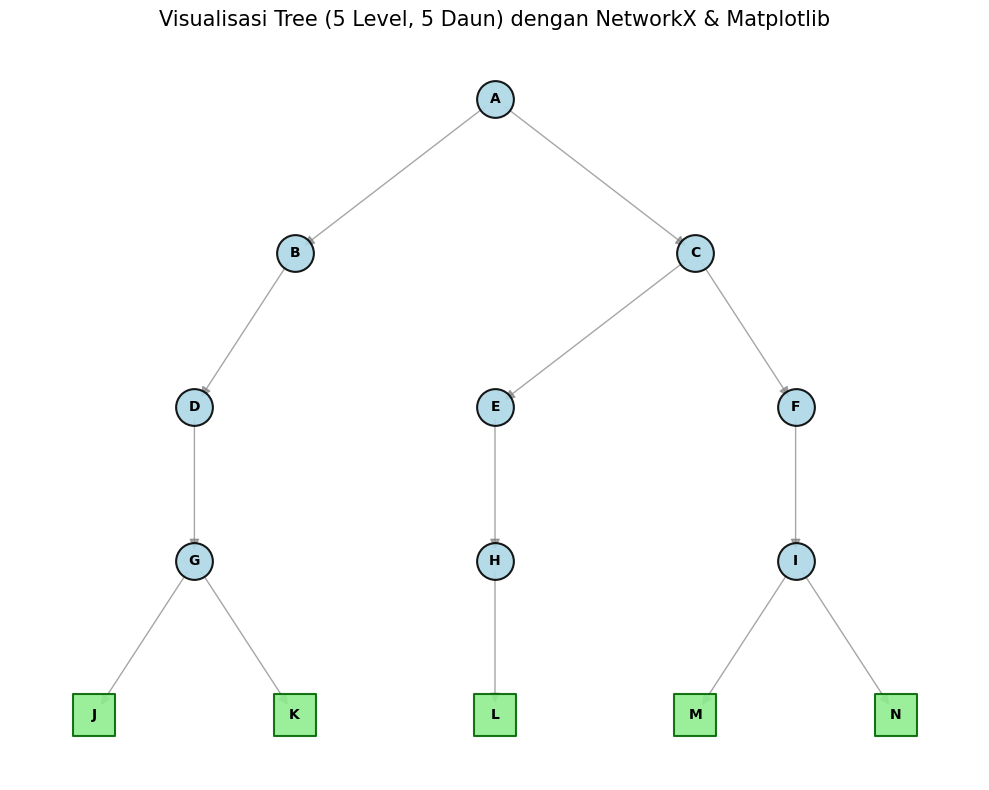

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Buat Struktur Tree menggunakan NetworkX ---

# Inisialisasi graf kosong
G = nx.DiGraph() # Gunakan DiGraph (Directed Graph) untuk tree yang memiliki arah dari parent ke child

# Tambahkan Node dan Edge sesuai dengan struktur tree sebelumnya
# Level 0 (Akar)
G.add_node("A", level=0)

# Level 1
G.add_edge("A", "B")
G.add_node("B", level=1)
G.add_edge("A", "C")
G.add_node("C", level=1)

# Level 2
G.add_edge("B", "D")
G.add_node("D", level=2)
G.add_edge("C", "E")
G.add_node("E", level=2)
G.add_edge("C", "F")
G.add_node("F", level=2)

# Level 3
G.add_edge("D", "G")
G.add_node("G", level=3)
G.add_edge("E", "H")
G.add_node("H", level=3)
G.add_edge("F", "I")
G.add_node("I", level=3)

# Level 4 (Daun - 5 daun)
# Tambahkan atribut 'is_leaf' untuk styling khusus
G.add_edge("G", "J")
G.add_node("J", level=4, is_leaf=True)
G.add_edge("G", "K")
G.add_node("K", level=4, is_leaf=True)
G.add_edge("H", "L")
G.add_node("L", level=4, is_leaf=True)
G.add_edge("I", "M")
G.add_node("M", level=4, is_leaf=True)
G.add_edge("I", "N")
G.add_node("N", level=4, is_leaf=True)


# --- 2. Tentukan Posisi Node (Layout) ---
# NetworkX memiliki beberapa algoritma layout.
# 'multipartite_layout' sangat cocok untuk tree atau graf hierarkis
# karena dapat mengatur node berdasarkan level/lapisan.
# Kita perlu memberikan atribut 'subset' ke setiap node yang menunjukkan levelnya.
# Atau, kita bisa menggunakan 'hierarchy_layout' jika sudah ada di versi networkx Anda.
# Untuk NetworkX versi lama atau jika 'hierarchy_layout' tidak ada,
# kita bisa buat sendiri berdasarkan level atau menggunakan 'nx.spring_layout'
# dan menyesuaikannya.

# Pendekatan sederhana: Tentukan posisi Y berdasarkan level, dan X secara semi-acak atau berurutan
pos = {}
# Tentukan lebar plot untuk mengatur node secara horizontal
max_level = max(nx.get_node_attributes(G, 'level').values())

# Dictionary untuk menyimpan node di setiap level
nodes_per_level = {level: [node for node, data in G.nodes(data=True) if data['level'] == level]
                   for level in range(max_level + 1)}

for level, nodes_at_level in nodes_per_level.items():
    num_nodes = len(nodes_at_level)
    # Atur jarak horizontal antar node
    x_spacing = 1.0 / (num_nodes + 1)
    for i, node in enumerate(nodes_at_level):
        pos[node] = ( (i + 1) * x_spacing - (num_nodes + 1) * x_spacing / 2.0, -level ) # -level untuk layout dari atas ke bawah

# nx.multipartite_layout juga bisa digunakan jika atribut subset sudah disiapkan
# Contoh:
# for node, data in G.nodes(data=True):
#     data['subset'] = data['level']
# pos = nx.multipartite_layout(G, subset_key='subset')


# --- 3. Gambar Tree menggunakan Matplotlib ---

plt.figure(figsize=(10, 8)) # Ukuran figure

# Gambar node
# Dapatkan list node dan atributnya
node_colors = ['skyblue' if G.nodes[node].get('is_leaf') else 'lightblue' for node in G.nodes()]
node_shapes = ['o' if not G.nodes[node].get('is_leaf') else 's' for node in G.nodes()] # Lingkaran untuk non-daun, kotak untuk daun
node_sizes = [700 if not G.nodes[node].get('is_leaf') else 900 for node in G.nodes()] # Ukuran berbeda

# Node non-daun
non_leaf_nodes = [node for node, data in G.nodes(data=True) if not data.get('is_leaf')]
nx.draw_networkx_nodes(G, pos, nodelist=non_leaf_nodes, node_color='lightblue', node_size=700, alpha=0.9, linewidths=1.5, edgecolors='black')

# Node daun (leaves)
leaf_nodes = [node for node, data in G.nodes(data=True) if data.get('is_leaf')]
nx.draw_networkx_nodes(G, pos, nodelist=leaf_nodes, node_color='lightgreen', node_size=900, alpha=0.9, linewidths=1.5, edgecolors='darkgreen', node_shape='s')


# Gambar edge
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.0, alpha=0.7, arrows=True, arrowsize=15)

# Gambar label node
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

plt.title("Visualisasi Tree (5 Level, 5 Daun) dengan NetworkX & Matplotlib", size=15)
plt.axis('off') # Sembunyikan sumbu x dan y
plt.tight_layout() # Sesuaikan layout agar tidak terpotong

# Tampilkan plot
plt.show()

# Jika ingin menyimpan gambar
# plt.savefig("tree_networkx_matplotlib.png", format="png", dpi=300)
# print("Gambar tree_networkx_matplotlib.png telah disimpan.")

<sub>
Penjelasan saya :
</sub>

Pada tree di atas, kita akan mulai melakukan BFS dari node A. Prosesnya adalah sebagai berikut:

- level 0: A
1. Mulai dari node A, masukkan A ke dalam antrean.
2. Keluarkan A dari antrean dan kunjungi node tersebut. Masukkan semua tetangga A (B dan C) ke dalam antrean.

- level 1: B, C
3. Keluarkan B dari antrean dan kunjungi node tersebut. Masukkan semua tetangga B (D) ke dalam antrean.
4. Keluarkan C dari antrean dan kunjungi node tersebut. Masukkan semua tetangga C (E dan F) ke dalam antrean.

- level 2: D, E, F
5. Keluarkan D dari antrean dan kunjungi node tersebut. Masukkan semua tetangga D (G) ke dalam antrean.
6. Keluarkan E dari antrean dan kunjungi node tersebut. Masukkan semua tetangga E (H) ke dalam antrean.
7. Keluarkan F dari antrean dan kunjungi node tersebut. Masukkan semua tetangga F (I) ke dalam antrean.

- level 3: G, H, I
8. Keluarkan G dari antrean dan kunjungi node tersebut. Masukkan semua tetangga G (J dan K) ke dalam antrean.
9. Keluarkan H dari antrean dan kunjungi node tersebut. Masukkan semua tetangga H (L) ke dalam antrean.
10. Keluarkan I dari antrean dan kunjungi node tersebut. Masukkan semua tetangga I (M dan N) ke dalam antrean.

Setelah semua node dikunjungi, urutan kunjungan BFS adalah: A, B, C, D, E, F, G, H, I, J, K, L, M, N.

---

#### Kesimpulan

<sub>
Kesimpulan Gemini AI :
</sub>

Breadth-First Search (BFS) adalah algoritma yang efektif untuk menjelajahi graf atau pohon dengan cara sistematis (`lapis demi lapis`), menjelajahi semua node pada level yang sama sebelum pindah ke level berikutnya. BFS sangat berguna untuk menemukan jalur terpendek dalam graf yang tidak berbobot dan memiliki berbagai aplikasi di dunia nyata, seperti dalam sistem navigasi, jejaring sosial, dan web crawling. Dengan menggunakan antrean untuk melacak node yang akan dijelajahi dan menandai node yang sudah dikunjungi, BFS memastikan bahwa semua node dieksplorasi secara menyeluruh dan efisien.

<sub>
Kesimpulan saya :
</sub>

Breadth-First Search (BFS) adalah algoritma yang menjelajahi graf atau pohon dengan cara mengecek semua node pada level yang sama terlebih dahulu sebelum melanjutkan ke level berikutnya. 

#### Referensi

- [Sistem Pembelajaran Algoritma Best First Search, Breadth First Search & Depth First Search](https://jti.publicascientificsolution.com/index.php/rp/article/view/15)

- [PERBANDINGAN ALGORITMA BREADTH FIRST SEARCH DAN DEPTH FIRST SEARCH PADA PERMAINAN TETRAVEX](https://repository.ukdw.ac.id/3244/)

- [Penerapan Algoritma Breadth First Search dan Depth First Search pada Game Angka](https://jurnal.polgan.ac.id/index.php/jmp/article/view/12340)

- [Analisis Penggunaan Algoritma Breadth First Search Dalam Konsep Artificial Intellegencia](https://ejournal.stmik-time.ac.id/index.php/jurnalTIMES/article/view/6)

- [Designing a Chess Game Application Using the Android-Based Breadth First Search Method](https://journal.aira.or.id/index.php/cosie/article/view/871)

---

## **2.Depth-First Search (DFS)**

<sub>
Menggunakan AI : Copilot dengan Model Gemini <br>
prompt : Jelaskan konsep Depth-First Search (DFS) dengan cara yang sangat sederhana, seolah-olah menjelaskannya kepada seseorang yang tidak memiliki latar belakang teknis. Gunakan analogi atau contoh sehari-hari untuk membantu pemahaman.
</sub>

---

Bayangkan Anda sedang berada di dalam sebuah labirin yang sangat besar dan ingin menemukan jalan keluar. Anda tidak punya peta, jadi Anda harus mencoba-coba setiap jalan.

**Depth-First Search (DFS)** adalah salah satu cara atau strategi untuk menjelajahi labirin tersebut. Namanya sendiri sudah memberikan petunjuk: "Depth-First" artinya **"Mendahulukan Kedalaman"**.

#### Analogi Labirin

1.  **Pilih Satu Jalan dan Terus Ikuti**: Anda mulai dari titik awal dan memilih satu lorong. Anda akan terus berjalan menyusuri lorong itu sedalam mungkin, tanpa berbelok ke persimpangan lain.

2.  **Menemukan Jalan Buntu**: Anda terus berjalan sampai akhirnya Anda menemui jalan buntu atau kembali ke tempat yang sudah pernah Anda lewati.

3.  **Mundur (Backtrack)**: Setelah menemui jalan buntu, Anda tidak kembali ke awal. Anda hanya perlu **mundur satu langkah** ke persimpangan terakhir yang Anda lewati.

4.  **Coba Jalan Lain**: Di persimpangan tersebut, Anda lihat apakah ada lorong lain yang belum pernah Anda coba.
    *   Jika **ada**, Anda pilih lorong baru itu dan ulangi lagi dari langkah 1 (terus berjalan sedalam mungkin).
    *   Jika **tidak ada** (semua lorong dari persimpangan ini sudah dijelajahi), Anda mundur lagi satu langkah ke persimpangan sebelumnya dan periksa lagi.

5.  **Ulangi Sampai Selesai**: Anda terus mengulangi proses ini—maju sedalam mungkin, mundur jika buntu, lalu coba cabang lain — sampai seluruh labirin telah Anda jelajahi atau Anda menemukan jalan keluar.


Jadi , DFS adalah cara sistematis untuk menjelajahi semua kemungkinan jalan dalam sebuah labirin dengan fokus pada satu jalur sampai habis sebelum mencoba jalur lain. Ini seperti menjelajahi pohon cabang, di mana Anda mengikuti satu cabang sampai ujungnya sebelum kembali dan mencoba cabang lain.

<sub>
Pendapat saya :
</sub>

DFS adalah metode yang menjelajahi graf atau pohon dengan cara mendalam atau fokus pada satu jalur terlebih dahulu, sebelum kembali dan mencoba jalur lain.  

#### Aturan Utama DFS:
- Gunakan tumpukan (stack) untuk melacak node yang akan dijelajahi.
- Tandai node yang sudah dikunjungi untuk menghindari siklus.
- Fokus pada satu jalur sampai habis.
- Mundur saat menemui jalan buntu.
- Coba jalur lain di persimpangan.


#### Contoh gambar graf DFS

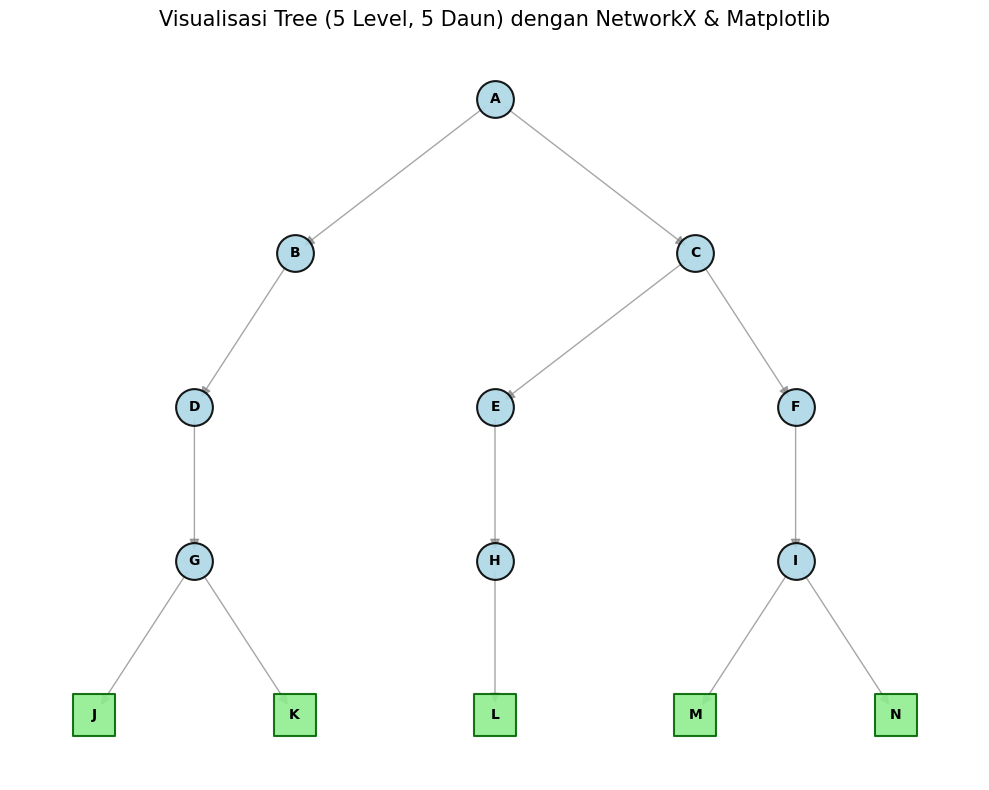

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Buat Struktur Tree menggunakan NetworkX ---

# Inisialisasi graf kosong
G = nx.DiGraph() # Gunakan DiGraph (Directed Graph) untuk tree yang memiliki arah dari parent ke child

# Tambahkan Node dan Edge sesuai dengan struktur tree sebelumnya
# Level 0 (Akar)
G.add_node("A", level=0)

# Level 1
G.add_edge("A", "B")
G.add_node("B", level=1)
G.add_edge("A", "C")
G.add_node("C", level=1)

# Level 2
G.add_edge("B", "D")
G.add_node("D", level=2)
G.add_edge("C", "E")
G.add_node("E", level=2)
G.add_edge("C", "F")
G.add_node("F", level=2)

# Level 3
G.add_edge("D", "G")
G.add_node("G", level=3)
G.add_edge("E", "H")
G.add_node("H", level=3)
G.add_edge("F", "I")
G.add_node("I", level=3)

# Level 4 (Daun - 5 daun)
# Tambahkan atribut 'is_leaf' untuk styling khusus
G.add_edge("G", "J")
G.add_node("J", level=4, is_leaf=True)
G.add_edge("G", "K")
G.add_node("K", level=4, is_leaf=True)
G.add_edge("H", "L")
G.add_node("L", level=4, is_leaf=True)
G.add_edge("I", "M")
G.add_node("M", level=4, is_leaf=True)
G.add_edge("I", "N")
G.add_node("N", level=4, is_leaf=True)


# --- 2. Tentukan Posisi Node (Layout) ---
# NetworkX memiliki beberapa algoritma layout.
# 'multipartite_layout' sangat cocok untuk tree atau graf hierarkis
# karena dapat mengatur node berdasarkan level/lapisan.
# Kita perlu memberikan atribut 'subset' ke setiap node yang menunjukkan levelnya.
# Atau, kita bisa menggunakan 'hierarchy_layout' jika sudah ada di versi networkx Anda.
# Untuk NetworkX versi lama atau jika 'hierarchy_layout' tidak ada,
# kita bisa buat sendiri berdasarkan level atau menggunakan 'nx.spring_layout'
# dan menyesuaikannya.

# Pendekatan sederhana: Tentukan posisi Y berdasarkan level, dan X secara semi-acak atau berurutan
pos = {}
# Tentukan lebar plot untuk mengatur node secara horizontal
max_level = max(nx.get_node_attributes(G, 'level').values())

# Dictionary untuk menyimpan node di setiap level
nodes_per_level = {level: [node for node, data in G.nodes(data=True) if data['level'] == level]
                   for level in range(max_level + 1)}

for level, nodes_at_level in nodes_per_level.items():
    num_nodes = len(nodes_at_level)
    # Atur jarak horizontal antar node
    x_spacing = 1.0 / (num_nodes + 1)
    for i, node in enumerate(nodes_at_level):
        pos[node] = ( (i + 1) * x_spacing - (num_nodes + 1) * x_spacing / 2.0, -level ) # -level untuk layout dari atas ke bawah

# nx.multipartite_layout juga bisa digunakan jika atribut subset sudah disiapkan
# Contoh:
# for node, data in G.nodes(data=True):
#     data['subset'] = data['level']
# pos = nx.multipartite_layout(G, subset_key='subset')


# --- 3. Gambar Tree menggunakan Matplotlib ---

plt.figure(figsize=(10, 8)) # Ukuran figure

# Gambar node
# Dapatkan list node dan atributnya
node_colors = ['skyblue' if G.nodes[node].get('is_leaf') else 'lightblue' for node in G.nodes()]
node_shapes = ['o' if not G.nodes[node].get('is_leaf') else 's' for node in G.nodes()] # Lingkaran untuk non-daun, kotak untuk daun
node_sizes = [700 if not G.nodes[node].get('is_leaf') else 900 for node in G.nodes()] # Ukuran berbeda

# Node non-daun
non_leaf_nodes = [node for node, data in G.nodes(data=True) if not data.get('is_leaf')]
nx.draw_networkx_nodes(G, pos, nodelist=non_leaf_nodes, node_color='lightblue', node_size=700, alpha=0.9, linewidths=1.5, edgecolors='black')

# Node daun (leaves)
leaf_nodes = [node for node, data in G.nodes(data=True) if data.get('is_leaf')]
nx.draw_networkx_nodes(G, pos, nodelist=leaf_nodes, node_color='lightgreen', node_size=900, alpha=0.9, linewidths=1.5, edgecolors='darkgreen', node_shape='s')


# Gambar edge
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.0, alpha=0.7, arrows=True, arrowsize=15)

# Gambar label node
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

plt.title("Visualisasi Tree (5 Level, 5 Daun) dengan NetworkX & Matplotlib", size=15)
plt.axis('off') # Sembunyikan sumbu x dan y
plt.tight_layout() # Sesuaikan layout agar tidak terpotong

# Tampilkan plot
plt.show()

# Jika ingin menyimpan gambar
# plt.savefig("tree_networkx_matplotlib.png", format="png", dpi=300)
# print("Gambar tree_networkx_matplotlib.png telah disimpan.")

#### Kesimpulan Sederhana

<sub>
Kesimpulan dari Gemini AI :
</sub>

Secara singkat, DFS adalah strategi penelusuran yang fokus untuk **menjelajah satu cabang sampai tuntas** sebelum pindah ke cabang lainnya. Ini seperti seorang penjelajah yang sangat fokus pada satu jalur, dan baru akan mencoba jalur lain jika jalur pertama sudah pasti buntu.

Dalam dunia komputer, "labirin" ini bisa berupa struktur data seperti *graph* (jaringan kota dan jalan) atau *tree* (silsilah keluarga), dan DFS digunakan untuk mengunjungi setiap "kota" atau "anggota keluarga" dalam struktur tersebut.

<sub>
Kesimpulan saya :
</sub>

Mirip dengan kesimpulan di atas, DFS adalah metode penelusuran atau pencarian yang menekankan pada eksplorasi mendalam pada satu jalur atau edge sebelum beralih ke jalur lain. 


#### Refensi

- [Sistem Pembelajaran Algoritma Best First Search, Breadth First Search & Depth First Search](https://jti.publicascientificsolution.com/index.php/rp/article/view/15)

- [PENERAPAN ALGORITMA DEPTH FIRST SEARCH PADA SISTEM PENCARIANDOKUMEN](https://jurnal.poltekba.ac.id/index.php/prosiding/article/view/395/242)

- [Implementasi Algoritma Depth First Search Dalam Penyelesaian Permasalahan Lintasan dan Sirkuit Euler](https://journal.unimma.ac.id/index.php/komtika/article/view/8672)

- [PERBANDINGAN ALGORITMA BREADTH FIRST SEARCH DAN DEPTH FIRST SEARCH PADA PERMAINAN TETRAVEX](https://repository.ukdw.ac.id/3244/)

- [Aplikasi Berbasis Mobile untuk Pencarian Rute Angkutan Umum Kota Makassar Menggunakan Algoritma Depth First Search](https://jkd.komdigi.go.id/index.php/pekommas/article/view/306)

---

## **3. Backtracking**

<sub>
Menggunakan AI : Copilot dengan Model Gemini
prompt : Jelaskan konsep Backtracking dengan cara yang sangat sederhana, seolah-olah menjelaskannya kepada seseorang yang tidak memiliki latar belakang teknis. Gunakan analogi atau contoh sehari-hari untuk membantu pemahaman.
</sub>

---
Bayangkan Anda sedang bermain teka-teki labirin di mana Anda harus menemukan jalan keluar. Anda mulai dari titik awal dan mencoba berbagai jalur untuk mencapai tujuan. Namun, terkadang Anda menemukan jalan buntu atau jalur yang tidak mengarah ke tujuan. Inilah saatnya konsep **Backtracking** berperan.

apakah backtracking terdapat pada DFS? ya, backtracking adalah bagian dari DFS.
apakah backtracking terdapat pada BFS? tidak, backtracking tidak terdapat pada BFS.

karena pada BFS, kita menjelajahi semua node pada level yang sama terlebih dahulu sebelum pindah ke level berikutnya, sehingga tidak perlu mundur atau kembali ke node sebelumnya. Sedangkan pada DFS, kita menjelajahi satu jalur sampai habis sebelum kembali dan mencoba jalur lain, sehingga backtracking diperlukan untuk kembali ke titik sebelumnya ketika menemui jalan buntu.

<sub>
Pendapat saya :
</sub>

Backtracking adalah teknik pemecahan masalah yang mengulangi proses pencarian solusi dengan cara mencoba-coba berbagai kemungkinan solusi, dan jika menemukan jalan buntu, maka mundur (backtrack) ke langkah sebelumnya untuk mencoba jalur lain hingga solusi ditemukan atau semua kemungkinan telah dicoba.

---

# **Studi Kasus Maudy**

Suatu pagi, Maudy ingin pergi ke acara penting dan ia sudah memutuskan ingin memakai baju dress favoritnya. Ia membuka lemari besar miliknya. Lemari itu tidak tersusun secara acak—Maudy menatanya seperti pohon (tree), dengan tingkatan rak sebagai level-levelnya.<br>
<br>
Setiap level memiliki beberapa rak kecil yang berisi jenis baju berbeda: baju kaos, PDH, jaket ringan, hingga dress.
Dress yang ia cari disimpan di salah satu daun (node paling ujung) pada level kelima dari struktur lemari itu.<br>
<br>

untuk menemukan dress itu, Maudy memutuskan untuk menggunakan metode Depth-First Search (DFS) dengan bantuan teknik Backtracking. Berikut adalah bagaimana Maudy melakukannya:

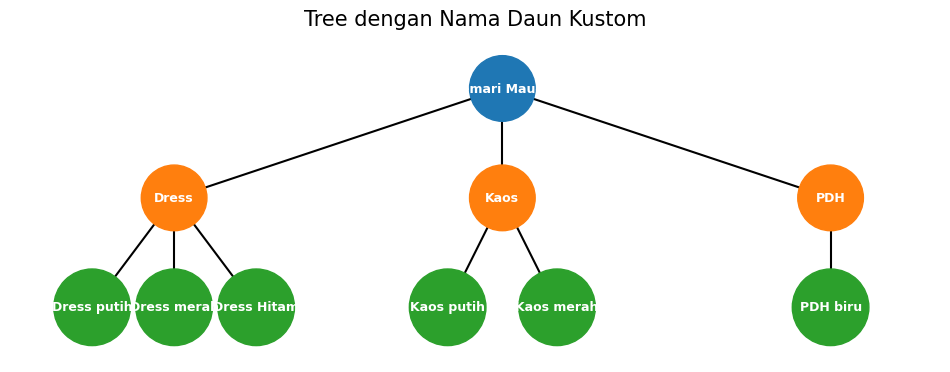

In [1]:
import matplotlib.pyplot as plt

def draw_custom_named_tree():
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # --- 1. Masukkan Nama Daun Di Sini ---
    # Pastikan jumlahnya ada 6 sesuai jumlah daun
    nama_daun = ["Dress putih", "Dress merah", "Dress Hitam", "Kaos putih", "Kaos merah", "PDH biru", "PDH hitam"]
    
    # --- Definisi Koordinat (Sama seperti sebelumnya) ---
    root = (0, 4)
    level1_nodes = [(-6, 2), (0, 2), (6, 2)]
    
    # Distribusi: 3 Kiri, 2 Tengah, 1 Kanan
    leaves_groups = [
        [(-7.5, 0), (-6, 0), (-4.5, 0)], # 3 Daun Kiri
        [(-1, 0), (1, 0)],               # 2 Daun Tengah
        [(6, 0)]                         # 1 Daun Kanan
    ]

    # --- Menggambar Garis ---
    for node in level1_nodes:
        ax.plot([root[0], node[0]], [root[1], node[1]], 'k-', zorder=1)
    
    for i, parent in enumerate(level1_nodes):
        children = leaves_groups[i]
        for leaf in children:
            ax.plot([parent[0], leaf[0]], [parent[1], leaf[1]], 'k-', zorder=1)

    # --- Menggambar Node ---
    def plot_node(position, text, color, radius=0.6, font_size=9):
        circle = plt.Circle(position, radius=radius, color=color, zorder=2)
        ax.add_patch(circle)
        ax.text(position[0], position[1], text, ha='center', va='center', 
                color='white', fontweight='bold', fontsize=font_size, zorder=3)

    # Root & Level 1
    plot_node(root, "Lemari Maudy", "#1f77b4")
    labels_l1 = ["Dress", "Kaos", "PDH"]
    for i, node in enumerate(level1_nodes):
        plot_node(node, labels_l1[i], "#ff7f0e")

    # --- BAGIAN PENTING: Menggambar Daun dengan Nama Custom ---
    index_nama = 0 # Kita mulai dari urutan ke-0
    
    for group in leaves_groups:
        for leaf_coord in group:
            # Ambil nama dari list berdasarkan index saat ini
            text_label = nama_daun[index_nama] 
            
            # Gambar node
            plot_node(leaf_coord, text_label, "#2ca02c", radius=0.7)
            
            # Pindah ke nama berikutnya
            index_nama += 1

    # --- Finishing ---
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Tree dengan Nama Daun Kustom", fontsize=15)
    plt.xlim(-9, 8)
    plt.ylim(-1, 5)
    plt.show()

if __name__ == "__main__":
    draw_custom_named_tree()

```pseudocode
procedure DFS_Recursive(input u : vertex)
{ 
  Mencari jalur terdalam dari simpul u menggunakan strategi Depth First Search 
  Masukan: u adalah simpul awal (index integer)
  Kondisi Global: array visited[] diinisialisasi 0 semua
}

Algoritma:
    visited[u] ← 1      { 1. Tandai simpul u saat ini sebagai sudah dikunjungi }
    
    write(u)            { 2. Cetak atau proses data simpul u }

    for every v ∈ Adj[u] do      { 3. Untuk setiap tetangga v dari u }
        if visited[v] = 0 then   { 4. Cek matematika: Jika v bernilai 0 (belum) }
            DFS_Recursive(v)     { 5. Panggil fungsi ini lagi untuk v }
        endif
    endfor
```

atau
```pseudocode
Fungsi CariBaju(NodeSaatIni, TargetDicari):

    1. CETAK "Sedang memeriksa: " + Nama NodeSaatIni

    2. JIKA NodeSaatIni.nama ADALAH TargetDicari:
        KEMBALIKAN "Ketemu! Barang ada di sini."
    
    3. JIKA NodeSaatIni tidak punya anak (ujung jalan/daun):
        KEMBALIKAN "Tidak ditemukan di jalur ini"

    4. UNTUK SETIAP Anak (Cabang) DARI NodeSaatIni:
        
        # Ini langkah rekursif (memanggil dirinya sendiri untuk masuk lebih dalam)
        Hasil = CariBaju(Anak, TargetDicari)
        
        JIKA Hasil ADALAH "Ketemu!":
            KEMBALIKAN Hasil (Berhenti mencari, tugas selesai)

    5. KEMBALIKAN "Barang tidak ada di seluruh pohon ini"
```


---

Algoritma DFS memiliki fungsi-fungsi utama sebagai berikut:

1. **Pruning (Pemangkasan)** <br>

    "Intip labelnya, kalau salah, jangan dibuka."

    Pruning adalah tindakan memotong atau mengabaikan satu cabang jalur pencarian secara utuh karena kita yakin jawaban tidak mungkin ada di sana. Ini dilakukan untuk menghemat waktu.

    * Analogy: Anda sedang mencari Dress. Di dalam lemari, Anda melihat tumpukan kotak dengan label besar: "KAOS". Tanpa perlu membuka kotak itu dan mengecek isinya satu per satu (Kaos Putih, Kaos Merah, dll), Anda langsung memutuskan: "Ah, ini isinya pasti Kaos, bukan Dress. Lewati saja sekotak ini!"

    Tindakan "melewati sekotak penuh" itulah yang disebut Pruning. Anda memangkas seluruh cabang "Kaos" dari daftar pencarian.

<br>

2. **Simpul Mati (Dead Node)**

    "Jalan buntu atau Misi Gagal."

    1. Simpul mati adalah titik/node yang sudah tidak bisa diperluas lagi. Ini terjadi karena dua alasan:

    2. Sudah Mentok (Daun): Tidak ada lagi cabang di bawahnya.

    Melanggar Aturan (Pruned): Cabang ini sudah dipangkas (pruning) karena tidak memenuhi syarat.

    Begitu sebuah simpul menjadi "Mati", kita harus mundur (backtrack) ke simpul sebelumnya.

    * Analogy: Anda membuka lipatan baju "Dress Putih".

        * Apakah ini Dress Hitam? Bukan.

        * Apakah ada lipatan lain di dalamnya? Tidak ada.

    Maka, "Dress Putih" adalah Simpul Mati. Anda selesai berurusan dengannya dan tidak ada lagi yang bisa dilakukan di situ.

<br>

3. **Simpul Hidup (Live Node)**

    "Sedang diperiksa atau Sedang antre."

    Simpul hidup adalah titik/node yang sudah kita temukan (sudah dikunjungi), tetapi anak-anak atau cabangnya belum selesai diperiksa semua. Simpul ini masih punya potensi menyimpan jawaban.

    * Analogy: Bayangkan Anda baru saja membuka pintu "Lemari Mau" (Root). Anda melihat ada tumpukan "Dress", "Kaos", dan "PDH".
    Saat ini, Anda memutuskan untuk mengecek tumpukan "Dress" dulu.

        * Tumpukan "Dress" adalah Simpul Hidup (karena sedang Anda geledah).

        * Tumpukan "Kaos" dan "PDH" juga berstatus Simpul Hidup (karena mereka sudah terlihat antre menunggu giliran untuk diperiksa).

    Selama Anda belum memutuskan bahwa tumpukan itu "Gagal/Selesai", mereka masih "Hidup".

4. **Fungsi Pembatas (Bounding Function)**

    "Buku Peraturan atau Satpam."

    Ini adalah "logika" atau "rumus" yang digunakan untuk menentukan apakah kita harus melakukan Pruning atau tidak. Fungsi ini yang menilai apakah sebuah simpul layak untuk dijadikan Simpul Hidup atau harus langsung dijadikan Simpul Mati.

    * Analogy: Sebelum Anda memutuskan untuk membuka sebuah tumpukan, otak Anda punya aturan (Fungsi Pembatas):

    "Hanya buka tumpukan jika labelnya mengandung kata 'Dress'. Jika labelnya lain, matikan simpul itu."

        * Saat melihat tumpukan "Kaos", Fungsi Pembatas bekerja: "Apakah labelnya Dress? Tidak. -> Matikan!"
        
        * Saat melihat tumpukan "Dress", Fungsi Pembatas bekerja: "Apakah labelnya Dress? Ya. -> Biarkan Hidup & Periksa."